# **Automatidata project**
**Course 5 - Regression Analysis: Simplify complex data relationships**

The data consulting firm Automatidata has recently hired you as the newest member of their data analytics team. Their newest client, the NYC Taxi and Limousine Commission (New York City TLC), wants the Automatidata team to build a multiple linear regression model to predict taxi fares using existing data that was collected over the course of a year. The team is getting closer to completing the project, having completed an initial plan of action, initial Python coding work, EDA, and A/B testing.

The Automatidata team has reviewed the results of the A/B testing. Now it’s time to work on predicting the taxi fare amounts. You’ve impressed your Automatidata colleagues with your hard work and attention to detail. The data team believes that you are ready to build the regression model and update the client New York City TLC about your progress.

A notebook was structured and prepared to help you in this project. Please complete the following questions.

# Course 5 End-of-course project: Build a multiple linear regression model

In this activity, you will build a multiple linear regression model. As you've learned, multiple linear regression helps you estimate the linear relationship between one continuous dependent variable and two or more independent variables. For data science professionals, this is a useful skill because it allows you to consider more than one variable against the variable you're measuring against. This opens the door for much more thorough and flexible analysis to be completed. 

Completing this activity will help you practice planning out and buidling a multiple linear regression model based on a specific business need. The structure of this activity is designed to emulate the proposals you will likely be assigned in your career as a data professional. Completing this activity will help prepare you for those career moments.
<br/>

**The purpose** of this project is to demostrate knowledge of EDA and a multiple linear regression model

**The goal** is to build a multiple linear regression model and evaluate the model
<br/>
*This activity has three parts:*

**Part 1:** EDA & Checking Model Assumptions
* What are some purposes of EDA before constructing a multiple linear regression model?

**Part 2:** Model Building and evaluation
* What resources do you find yourself using as you complete this stage?

**Part 3:** Interpreting Model Results

* What key insights emerged from your model(s)?

* What business recommendations do you propose based on the models built?

# Build a multiple linear regression model

# **PACE stages**


Throughout these project notebooks, you'll see references to the problem-solving framework PACE. The following notebook components are labeled with the respective PACE stage: Plan, Analyze, Construct, and Execute.

## PACE: **Plan**

Consider the questions in your PACE Strategy Document to reflect on the Plan stage.


### Task 1. Imports and loading
Import the packages that you've learned are needed for building linear regression models.

In [76]:
# Imports
# Packages for numerics + dataframes
import pandas as pd
import numpy as np

# Packages for visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Packages for date conversions for calculating trip durations
import datetime as dt


**Note:** `Pandas` is used to load the NYC TLC dataset. As shown in this cell, the dataset has been automatically loaded in for you. You do not need to download the .csv file, or provide more code, in order to access the dataset and proceed with this lab. Please continue with this activity by completing the following instructions.

In [77]:
# Load dataset into dataframe 
df0 = pd.read_csv("2017_Yellow_Taxi_Trip_Data.csv") 


## PACE: **Analyze**

In this stage, consider the following question where applicable to complete your code response:

* What are some purposes of EDA before constructing a multiple linear regression model?


EDA is used to
- remove irrelevant or inconsistent data
- locate and remove outliers
- impute data or drop rows with missing data
- determine if data types are suitable for data modeling and data aggregation

### Task 2a. Explore data with EDA

Analyze and discover data, looking for correlations, missing data, outliers, and duplicates.

Start with `.shape` and `.info()`.

In [78]:
# Start with `.shape` and `.info()`
df0.shape


(22699, 18)

In [79]:
df0.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22699 entries, 0 to 22698
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             22699 non-null  int64  
 1   VendorID               22699 non-null  int64  
 2   tpep_pickup_datetime   22699 non-null  object 
 3   tpep_dropoff_datetime  22699 non-null  object 
 4   passenger_count        22699 non-null  int64  
 5   trip_distance          22699 non-null  float64
 6   RatecodeID             22699 non-null  int64  
 7   store_and_fwd_flag     22699 non-null  object 
 8   PULocationID           22699 non-null  int64  
 9   DOLocationID           22699 non-null  int64  
 10  payment_type           22699 non-null  int64  
 11  fare_amount            22699 non-null  float64
 12  extra                  22699 non-null  float64
 13  mta_tax                22699 non-null  float64
 14  tip_amount             22699 non-null  float64
 15  to

Check for missing data and duplicates using `.isna()` and `.drop_duplicates()`.

In [80]:
# Check for missing data and duplicates using .isna() and .drop_duplicates()
df0.isna().value_counts()


Unnamed: 0  VendorID  tpep_pickup_datetime  tpep_dropoff_datetime  passenger_count  trip_distance  RatecodeID  store_and_fwd_flag  PULocationID  DOLocationID  payment_type  fare_amount  extra  mta_tax  tip_amount  tolls_amount  improvement_surcharge  total_amount
False       False     False                 False                  False            False          False       False               False         False         False         False        False  False    False       False         False                  False           22699
Name: count, dtype: int64

In [81]:
df0.drop_duplicates(inplace=True)


Use `.describe()`.

In [82]:
# Use .describe()
df0.describe(include='all')


,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
count,2.269900e+04,22699.000000,22699,22699,22699.000000,22699.000000,22699.000000,22699,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000
unique,NaN,NaN,22687,22688,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,04/15/2017 6:05:19 PM,10/18/2017 8:07:45 PM,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,2,2,NaN,NaN,NaN,22600,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,5.675849e+07,1.556236,NaN,NaN,1.642319,2.913313,1.043394,NaN,162.412353,161.527997,1.336887,13.026629,0.333275,0.497445,1.835781,0.312542,0.299551,16.310502
std,3.274493e+07,0.496838,NaN,NaN,1.285231,3.653171,0.708391,NaN,66.633373,70.139691,0.496211,13.243791,0.463097,0.039465,2.800626,1.399212,0.015673,16.097295
min,1.212700e+04,1.000000,NaN,NaN,0.000000,0.000000,1.000000,NaN,1.000000,1.000000,1.000000,-120.000000,-1.000000,-0.500000,0.000000,0.000000,-0.300000,-120.300000
25%,2.852056e+07,1.000000,NaN,NaN,1.000000,0.990000,1.000000,NaN,114.000000,112.000000,1.000000,6.500000,0.000000,0.500000,0.000000,0.000000,0.300000,8.750000
50%,5.673150e+07,2.000000,NaN,NaN,1.000000,1.610000,1.000000,NaN,162.000000,162.000000,1.000000,9.500000,0.000000,0.500000,1.350000,0.000000,0.300000,11.800000
75%,8.537452e+07,2.000000,NaN,NaN,2.000000,3.060000,1.000000,NaN,233.000000,233.000000,2.000000,14.500000,0.500000,0.500000,2.450000,0.000000,0.300000,17.800000


### Task 2b. Convert pickup & dropoff columns to datetime


In [83]:
# Check the format of the data
df0[['tpep_pickup_datetime', 'tpep_dropoff_datetime']].dtypes


tpep_pickup_datetime     object
tpep_dropoff_datetime    object
dtype: object

In [84]:
# Convert datetime columns to datetime
df0['tpep_pickup_datetime'] = pd.to_datetime(df0['tpep_pickup_datetime'])
df0['tpep_dropoff_datetime'] = pd.to_datetime(df0['tpep_dropoff_datetime'])

### Task 2c. Create duration column

Create a new column called `duration` that represents the total number of minutes that each taxi ride took.

In [85]:
# Create `duration` column
duration = df0['tpep_dropoff_datetime'] - df0['tpep_pickup_datetime']
duration = round(duration.dt.total_seconds()/60, 0)
df0['duration'] = duration
df0.head()


,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,duration
0,24870114,2,2017-03-25 08:55:43,2017-03-25 09:09:47,6,3.34,1,N,100,231,1,13.0,0.0,0.5,2.76,0.0,0.3,16.56,14.0
1,35634249,1,2017-04-11 14:53:28,2017-04-11 15:19:58,1,1.80,1,N,186,43,1,16.0,0.0,0.5,4.00,0.0,0.3,20.80,26.0
2,106203690,1,2017-12-15 07:26:56,2017-12-15 07:34:08,1,1.00,1,N,262,236,1,6.5,0.0,0.5,1.45,0.0,0.3,8.75,7.0
3,38942136,2,2017-05-07 13:17:59,2017-05-07 13:48:14,1,3.70,1,N,188,97,1,20.5,0.0,0.5,6.39,0.0,0.3,27.69,30.0
4,30841670,2,2017-04-15 23:32:20,2017-04-15 23:49:03,1,4.37,1,N,4,112,2,16.5,0.5,0.5,0.00,0.0,0.3,17.80,17.0


### Outliers

Call `df.info()` to inspect the columns and decide which ones to check for outliers.

In [86]:
df0.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22699 entries, 0 to 22698
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Unnamed: 0             22699 non-null  int64         
 1   VendorID               22699 non-null  int64         
 2   tpep_pickup_datetime   22699 non-null  datetime64[ns]
 3   tpep_dropoff_datetime  22699 non-null  datetime64[ns]
 4   passenger_count        22699 non-null  int64         
 5   trip_distance          22699 non-null  float64       
 6   RatecodeID             22699 non-null  int64         
 7   store_and_fwd_flag     22699 non-null  object        
 8   PULocationID           22699 non-null  int64         
 9   DOLocationID           22699 non-null  int64         
 10  payment_type           22699 non-null  int64         
 11  fare_amount            22699 non-null  float64       
 12  extra                  22699 non-null  float64       
 13  m

Keeping in mind that many of the features will not be used to fit your model, the most important columns to check for outliers are likely to be:
* `trip_distance`
* `fare_amount`
* `duration`



### Task 2d. Box plots

Plot a box plot for each feature: `trip_distance`, `fare_amount`, `duration`.

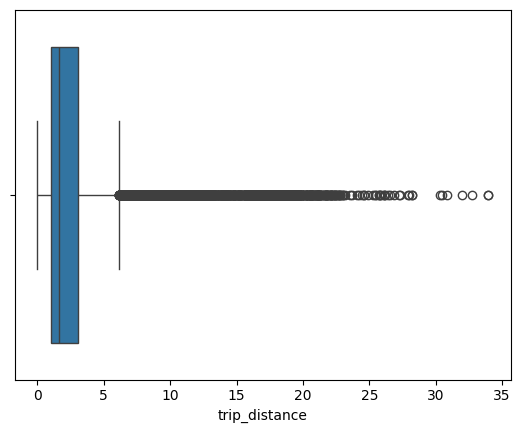

In [87]:
### YOUR CODE HERE ###
sns.boxplot(x='trip_distance', data=df0);


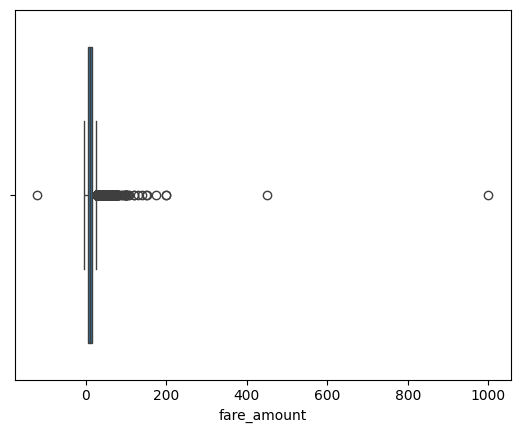

In [88]:
sns.boxplot(x='fare_amount', data=df0);

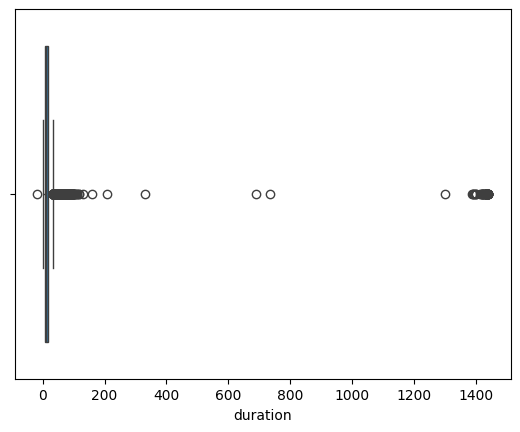

In [89]:
sns.boxplot(x='duration', data=df0);

**Questions:** 
1. Which variable(s) contains outliers? 

2. Are the values in the `trip_distance` column unbelievable?

3. What about the lower end? Do distances, fares, and durations of 0 (or negative values) make sense?

All three variables contain outliers. A minimum trip distance of 0 miles is not believable. Negative fare amount are nonsensical (the customer getting money). A distance of 0 with a positive fare amount does not make sense.

### Task 2e. Imputations

#### `trip_distance` outliers

You know from the summary statistics that there are trip distances of 0. Are these reflective of erroneous data, or are they very short trips that get rounded down?

To check, sort the column values, eliminate duplicates, and inspect the least 10 values. Are they rounded values or precise values?

In [90]:
# Are trip distances of 0 bad data or very short trips rounded down?
df0['trip_distance'].sort_values().drop_duplicates().head(10)


15816    0.00
19827    0.01
14468    0.02
13631    0.03
13517    0.04
10146    0.05
4423     0.06
922      0.07
22523    0.08
22035    0.09
Name: trip_distance, dtype: float64

The distances are captured with a high degree of precision. However, it might be possible for trips to have distances of zero if a passenger summoned a taxi and then changed their mind. Besides, are there enough zero values in the data to pose a problem?

Calculate the count of rides where the `trip_distance` is zero.

In [91]:
(df0['trip_distance']==0).sum(axis=0)


np.int64(148)

#### `fare_amount` outliers

In [92]:
df0['fare_amount'].describe()

count    22699.000000
mean        13.026629
std         13.243791
min       -120.000000
25%          6.500000
50%          9.500000
75%         14.500000
max        999.990000
Name: fare_amount, dtype: float64

**Question:** What do you notice about the values in the `fare_amount` column?

There are fare values less than 0.

Impute values less than $0 with `0`.

In [93]:
# Impute values less than $0 with 0
df0['fare_amount'] = df0['fare_amount'].apply(lambda row: row if row >= 0 else 0)

Now impute the maximum value as `Q3 + (6 * IQR)`.

In [94]:
def change_threshold(df, column_list, iqr_factor=6):
    '''
    Impute upper-limit values in specified columns based on their interquartile range.

    Arguments:
        column_list: A list of columns to iterate over
        iqr_factor: A number representing x in the formula:
                    Q3 + (x * IQR). Used to determine maximum threshold,
                    beyond which a point is considered an outlier.

    The IQR is computed for each column in column_list and values exceeding
    the upper threshold for each column are imputed with the upper threshold value.
    '''
    
    # Reassign minimum to zero
    for column in column_list:
        df[column] = df[column].apply(lambda x: x if x >= 0 else 0)

        # Calculate upper threshold
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        UT = Q3 + (iqr_factor * IQR)

        # Reassign values > threshold to threshold
        df[column] = df[column].apply(lambda x: x if x < UT else UT)
        
    return df

df0 = change_threshold(df0, ['fare_amount'])


#### `duration` outliers


In [95]:
# Call .describe() for duration outliers
duration.describe()


count    22699.000000
mean        17.012952
std         61.998403
min        -17.000000
25%          7.000000
50%         11.000000
75%         18.000000
max       1440.000000
dtype: float64

The `duration` column has problematic values at both the lower and upper extremities.

* **Low values:** There should be no values that represent negative time. Impute all negative durations with `0`.

* **High values:** Impute high values the same way you imputed the high-end outliers for fares: `Q3 + (6 * IQR)`.

In [96]:
# Impute low and high outliers
df0 = change_threshold(df0, ['duration'])


### Task 3a. Feature engineering

#### Create `mean_distance` column

When deployed, the model will not know the duration of a trip until after the trip occurs, so you cannot train a model that uses this feature. However, you can use the statistics of trips you *do* know to generalize about ones you do not know.

In this step, create a column called `mean_distance` that captures the mean distance for each group of trips that share pickup and dropoff points.

For example, if your data were:

|Trip|Start|End|Distance|
|--: |:---:|:-:|    |
| 1  | A   | B | 1  |
| 2  | C   | D | 2  |
| 3  | A   | B |1.5 |
| 4  | D   | C | 3  |

The results should be:
```
A -> B: 1.25 miles
C -> D: 2 miles
D -> C: 3 miles
```

Notice that C -> D is not the same as D -> C. All trips that share a unique pair of start and end points get grouped and averaged.

Then, a new column `mean_distance` will be added where the value at each row is the average for all trips with those pickup and dropoff locations:

|Trip|Start|End|Distance|mean_distance|
|--: |:---:|:-:|  :--   |:--   |
| 1  | A   | B | 1      | 1.25 |
| 2  | C   | D | 2      | 2    |
| 3  | A   | B |1.5     | 1.25 |
| 4  | D   | C | 3      | 3    |


Begin by creating a helper column called `pickup_dropoff`, which contains the unique combination of pickup and dropoff location IDs for each row.

One way to do this is to convert the pickup and dropoff location IDs to strings and join them, separated by a space. The space is to ensure that, for example, a trip with pickup/dropoff points of 12 & 151 gets encoded differently than a trip with points 121 & 51.

So, the new column would look like this:

|Trip|Start|End|pickup_dropoff|
|--: |:---:|:-:|  :--         |
| 1  | A   | B | 'A B'        |
| 2  | C   | D | 'C D'        |
| 3  | A   | B | 'A B'        |
| 4  | D   | C | 'D C'        |


In [97]:
# Create `pickup_dropoff` column
df0['pickup_dropoff'] = df0['PULocationID'].astype(str)+" "+df0['DOLocationID'].astype(str)
df0.head()

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,duration,pickup_dropoff
0,24870114,2,2017-03-25 08:55:43,2017-03-25 09:09:47,6,3.34,1,N,100,231,1,13.0,0.0,0.5,2.76,0.0,0.3,16.56,14.0,100 231
1,35634249,1,2017-04-11 14:53:28,2017-04-11 15:19:58,1,1.80,1,N,186,43,1,16.0,0.0,0.5,4.00,0.0,0.3,20.80,26.0,186 43
2,106203690,1,2017-12-15 07:26:56,2017-12-15 07:34:08,1,1.00,1,N,262,236,1,6.5,0.0,0.5,1.45,0.0,0.3,8.75,7.0,262 236
3,38942136,2,2017-05-07 13:17:59,2017-05-07 13:48:14,1,3.70,1,N,188,97,1,20.5,0.0,0.5,6.39,0.0,0.3,27.69,30.0,188 97
4,30841670,2,2017-04-15 23:32:20,2017-04-15 23:49:03,1,4.37,1,N,4,112,2,16.5,0.5,0.5,0.00,0.0,0.3,17.80,17.0,4 112


Now, use a `groupby()` statement to group each row by the new `pickup_dropoff` column, compute the mean, and capture the values only in the `trip_distance` column. Assign the results to a variable named `grouped`.

In [98]:
grouped = round(df0.groupby(['pickup_dropoff'])['trip_distance'].agg(['mean']),2)
grouped

,mean
pickup_dropoff,
1 1,2.43
10 148,15.70
100 1,16.89
100 100,0.25
100 107,1.18
...,...
97 65,0.50
97 66,1.40
97 80,3.84


`grouped` is an object of the `DataFrame` class.

1. Convert it to a dictionary using the [`to_dict()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.to_dict.html) method. Assign the results to a variable called `grouped_dict`. This will result in a dictionary with a key of `trip_distance` whose values are another dictionary. The inner dictionary's keys are pickup/dropoff points and its values are mean distances. This is the information you want.

```
Example:
grouped_dict = {'trip_distance': {'A B': 1.25, 'C D': 2, 'D C': 3}
```

2. Reassign the `grouped_dict` dictionary so it contains only the inner dictionary. In other words, get rid of `trip_distance` as a key, so:

```
Example:
grouped_dict = {'A B': 1.25, 'C D': 2, 'D C': 3}
 ```

In [99]:
# 1. Convert `grouped` to a dictionary
grouped_dict = grouped.to_dict()

# 2. Reassign to only contain the inner dictionary
grouped_dict = grouped_dict['mean']
grouped_dict

{'1 1': 2.43,
 '10 148': 15.7,
 '100 1': 16.89,
 '100 100': 0.25,
 '100 107': 1.18,
 '100 113': 2.02,
 '100 114': 1.94,
 '100 12': 4.55,
 '100 125': 2.84,
 '100 13': 4.2,
 '100 132': 17.22,
 '100 137': 1.3,
 '100 138': 10.43,
 '100 140': 2.75,
 '100 141': 2.11,
 '100 142': 1.7,
 '100 143': 1.58,
 '100 144': 3.01,
 '100 148': 4.11,
 '100 151': 3.67,
 '100 152': 4.9,
 '100 158': 1.94,
 '100 161': 0.98,
 '100 162': 1.22,
 '100 163': 1.27,
 '100 164': 0.84,
 '100 166': 5.2,
 '100 170': 0.85,
 '100 177': 12.0,
 '100 181': 9.34,
 '100 186': 0.64,
 '100 193': 4.39,
 '100 198': 9.01,
 '100 202': 5.3,
 '100 209': 4.43,
 '100 211': 2.48,
 '100 224': 1.95,
 '100 225': 7.5,
 '100 229': 1.78,
 '100 230': 0.73,
 '100 231': 3.52,
 '100 232': 3.84,
 '100 233': 1.25,
 '100 234': 1.25,
 '100 236': 3.34,
 '100 237': 2.56,
 '100 238': 3.36,
 '100 239': 2.33,
 '100 243': 8.77,
 '100 244': 7.9,
 '100 246': 1.17,
 '100 249': 1.81,
 '100 25': 7.36,
 '100 255': 6.35,
 '100 256': 5.86,
 '100 261': 3.81,
 '100 2

1. Create a `mean_distance` column that is a copy of the `pickup_dropoff` helper column.

2. Use the [`map()`](https://pandas.pydata.org/docs/reference/api/pandas.Series.map.html#pandas-series-map) method on the `mean_distance` series. Pass `grouped_dict` as its argument. Reassign the result back to the `mean_distance` series.
</br></br>
When you pass a dictionary to the `Series.map()` method, it will replace the data in the series where that data matches the dictionary's keys. The values that get imputed are the values of the dictionary.

```
Example:
df['mean_distance']
```

|mean_distance |
|  :-:         |
| 'A B'        |
| 'C D'        |
| 'A B'        |
| 'D C'        |
| 'E F'        |

```
grouped_dict = {'A B': 1.25, 'C D': 2, 'D C': 3}
df['mean_distance`] = df['mean_distance'].map(grouped_dict)
df['mean_distance']
```

|mean_distance |
|  :-:         |
| 1.25         |
| 2            |
| 1.25         |
| 3            |
| NaN          |

When used this way, the `map()` `Series` method is very similar to `replace()`, however, note that `map()` will impute `NaN` for any values in the series that do not have a corresponding key in the mapping dictionary, so be careful.

In [100]:
# 1. Create a mean_distance column that is a copy of the pickup_dropoff helper column
df0['mean_distance'] = df0['pickup_dropoff'].copy()

# 2. Map `grouped_dict` to the `mean_distance` column
df0['mean_distance'] = df0['mean_distance'].map(grouped_dict)

# Confirm that it worked
df0['mean_distance']


0         3.52
1         3.11
2         0.88
3         3.70
4         4.44
         ...  
22694     1.10
22695    18.76
22696     0.68
22697     2.08
22698     1.48
Name: mean_distance, Length: 22699, dtype: float64

#### Create `mean_duration` column

Repeat the process used to create the `mean_distance` column to create a `mean_duration` column.

In [101]:
# Create a dictionary where keys are unique pickup_dropoffs and values are
# mean trip duration for all trips with those pickup_dropoff combos
grouped = df0.groupby(['pickup_dropoff'])['duration'].agg(['mean'])
grouped_dict = grouped.to_dict()
grouped_dict = grouped_dict['mean']

df0['mean_duration'] = df0['pickup_dropoff'].copy()
df0['mean_duration'] = df0['mean_duration'].map(grouped_dict)
df0['mean_duration'] = round(df0['mean_duration'], 2)

# Confirm that it worked
df0['mean_duration']

0        23.00
1        24.44
2         7.26
3        30.00
4        15.00
         ...  
22694     8.61
22695    59.25
22696     6.61
22697    16.75
22698     9.42
Name: mean_duration, Length: 22699, dtype: float64

#### Create `day` and `month` columns

Create two new columns, `day` (name of day) and `month` (name of month) by extracting the relevant information from the `tpep_pickup_datetime` column.

In [102]:
# Create 'day' col
df0['day'] = df0['tpep_pickup_datetime'].dt.day_name()

# Create 'month' col
df0['month'] = df0['tpep_pickup_datetime'].dt.month_name()

df0.head()

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,duration,pickup_dropoff,mean_distance,mean_duration,day,month
0,24870114,2,2017-03-25 08:55:43,2017-03-25 09:09:47,6,3.34,1,N,100,231,1,13.0,0.0,0.5,2.76,0.0,0.3,16.56,14.0,100 231,3.52,23.00,Saturday,March
1,35634249,1,2017-04-11 14:53:28,2017-04-11 15:19:58,1,1.80,1,N,186,43,1,16.0,0.0,0.5,4.00,0.0,0.3,20.80,26.0,186 43,3.11,24.44,Tuesday,April
2,106203690,1,2017-12-15 07:26:56,2017-12-15 07:34:08,1,1.00,1,N,262,236,1,6.5,0.0,0.5,1.45,0.0,0.3,8.75,7.0,262 236,0.88,7.26,Friday,December
3,38942136,2,2017-05-07 13:17:59,2017-05-07 13:48:14,1,3.70,1,N,188,97,1,20.5,0.0,0.5,6.39,0.0,0.3,27.69,30.0,188 97,3.70,30.00,Sunday,May
4,30841670,2,2017-04-15 23:32:20,2017-04-15 23:49:03,1,4.37,1,N,4,112,2,16.5,0.5,0.5,0.00,0.0,0.3,17.80,17.0,4 112,4.44,15.00,Saturday,April


#### Create `rush_hour` column

Define rush hour as:
* Any weekday (not Saturday or Sunday) AND
* Either from 06:00&ndash;10:00 or from 16:00&ndash;20:00

Create a binary `rush_hour` column that contains a 1 if the ride was during rush hour and a 0 if it was not.

In [103]:
# Create 'rush_hour' col
df0['rush_hour'] = df0['day'].copy()

# If day is Saturday or Sunday, impute 0 in `rush_hour` column
df0['rush_hour'] = df0['rush_hour'].apply(lambda x: 0 if x in ['Sunday', 'Saturday'] else 1)

df0.head()

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,duration,pickup_dropoff,mean_distance,mean_duration,day,month,rush_hour
0,24870114,2,2017-03-25 08:55:43,2017-03-25 09:09:47,6,3.34,1,N,100,231,1,13.0,0.0,0.5,2.76,0.0,0.3,16.56,14.0,100 231,3.52,23.00,Saturday,March,0
1,35634249,1,2017-04-11 14:53:28,2017-04-11 15:19:58,1,1.80,1,N,186,43,1,16.0,0.0,0.5,4.00,0.0,0.3,20.80,26.0,186 43,3.11,24.44,Tuesday,April,1
2,106203690,1,2017-12-15 07:26:56,2017-12-15 07:34:08,1,1.00,1,N,262,236,1,6.5,0.0,0.5,1.45,0.0,0.3,8.75,7.0,262 236,0.88,7.26,Friday,December,1
3,38942136,2,2017-05-07 13:17:59,2017-05-07 13:48:14,1,3.70,1,N,188,97,1,20.5,0.0,0.5,6.39,0.0,0.3,27.69,30.0,188 97,3.70,30.00,Sunday,May,0
4,30841670,2,2017-04-15 23:32:20,2017-04-15 23:49:03,1,4.37,1,N,4,112,2,16.5,0.5,0.5,0.00,0.0,0.3,17.80,17.0,4 112,4.44,15.00,Saturday,April,0


In [104]:
def rush_hourizer(row):
    # check for weekdays (1) only
    if row['rush_hour'] == 1:
        # 6:00-10:00 condition
        if (row['tpep_pickup_datetime'].time() > dt.time(6)) and (row['tpep_dropoff_datetime'].time() < dt.time(10)):
            return 1
        # 16:00-20:00 condition
        elif (row['tpep_pickup_datetime'].time() > dt.time(16)) and (row['tpep_dropoff_datetime'].time() < dt.time(20)):
            return 1
        else:
            return 0
    # leave weekend days unchanged
    else:
        return 0
    

In [105]:
# Apply the `rush_hourizer()` function to the new column
df0['rush_hour'] = df0.apply(rush_hourizer, axis=1)

# View final transformation
df0.head()


,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,duration,pickup_dropoff,mean_distance,mean_duration,day,month,rush_hour
0,24870114,2,2017-03-25 08:55:43,2017-03-25 09:09:47,6,3.34,1,N,100,231,1,13.0,0.0,0.5,2.76,0.0,0.3,16.56,14.0,100 231,3.52,23.00,Saturday,March,0
1,35634249,1,2017-04-11 14:53:28,2017-04-11 15:19:58,1,1.80,1,N,186,43,1,16.0,0.0,0.5,4.00,0.0,0.3,20.80,26.0,186 43,3.11,24.44,Tuesday,April,0
2,106203690,1,2017-12-15 07:26:56,2017-12-15 07:34:08,1,1.00,1,N,262,236,1,6.5,0.0,0.5,1.45,0.0,0.3,8.75,7.0,262 236,0.88,7.26,Friday,December,1
3,38942136,2,2017-05-07 13:17:59,2017-05-07 13:48:14,1,3.70,1,N,188,97,1,20.5,0.0,0.5,6.39,0.0,0.3,27.69,30.0,188 97,3.70,30.00,Sunday,May,0
4,30841670,2,2017-04-15 23:32:20,2017-04-15 23:49:03,1,4.37,1,N,4,112,2,16.5,0.5,0.5,0.00,0.0,0.3,17.80,17.0,4 112,4.44,15.00,Saturday,April,0


### Task 4. Scatter plot

Create a scatterplot to visualize the relationship between `mean_duration` and `fare_amount`.

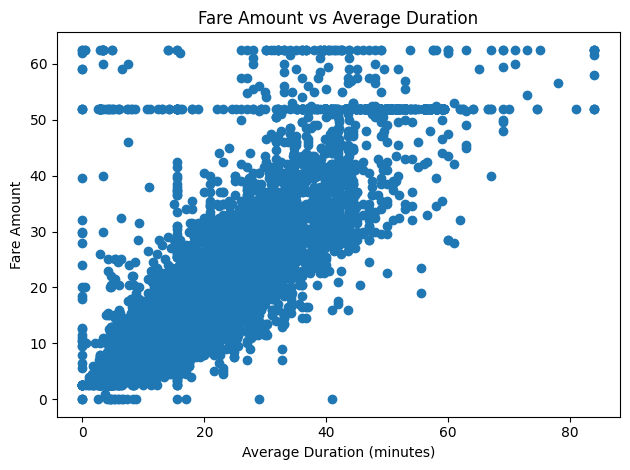

In [106]:
# Create a scatterplot to visualize the relationship between variables of interest
plt.scatter(x='mean_duration',y='fare_amount',data=df0)
plt.xlabel('Average Duration (minutes)')
plt.ylabel('Fare Amount')
plt.title('Fare Amount vs Average Duration')
plt.tight_layout()
plt.show()


The `mean_duration` variable correlates with the target variable. But what are the horizontal lines around fare amounts of 52 dollars and 63 dollars? What are the values and how many are there?

You know what one of the lines represents. 62 dollars and 50 cents is the maximum that was imputed for outliers, so all former outliers will now have fare amounts of \$62.50. What is the other line?

Check the value of the rides in the second horizontal line in the scatter plot.

In [107]:
fare52 = df0[df0['fare_amount']==52]

Examine the first 30 of these trips.

In [108]:
# Set pandas to display all columns
pd.set_option('display.max_columns', None)
fare52.head(30)

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,duration,pickup_dropoff,mean_distance,mean_duration,day,month,rush_hour
11,18600059,2,2017-03-05 19:15:30,2017-03-05 19:52:18,2,18.90,2,N,236,132,1,52.0,0.0,0.5,14.58,5.54,0.3,72.92,37.0,236 132,19.21,39.67,Sunday,March,0
110,47959795,1,2017-06-03 14:24:57,2017-06-03 15:31:48,1,18.00,2,N,132,163,1,52.0,0.0,0.5,0.00,0.00,0.3,52.80,67.0,132 163,19.23,53.10,Saturday,June,0
161,95729204,2,2017-11-11 20:16:16,2017-11-11 20:17:14,1,0.23,2,N,132,132,2,52.0,0.0,0.5,0.00,0.00,0.3,52.80,1.0,132 132,2.26,2.93,Saturday,November,0
247,103404868,2,2017-12-06 23:37:08,2017-12-07 00:06:19,1,18.93,2,N,132,79,2,52.0,0.0,0.5,0.00,0.00,0.3,52.80,29.0,132 79,19.43,47.33,Wednesday,December,1
379,80479432,2,2017-09-24 23:45:45,2017-09-25 00:15:14,1,17.99,2,N,132,234,1,52.0,0.0,0.5,14.64,5.76,0.3,73.20,29.0,132 234,17.65,50.00,Sunday,September,0
388,16226157,1,2017-02-28 18:30:05,2017-02-28 19:09:55,1,18.40,2,N,132,48,2,52.0,4.5,0.5,0.00,5.54,0.3,62.84,40.0,132 48,18.76,58.10,Tuesday,February,1
406,55253442,2,2017-06-05 12:51:58,2017-06-05 13:07:35,1,4.73,2,N,228,88,2,52.0,0.0,0.5,0.00,5.76,0.3,58.56,16.0,228 88,4.73,16.00,Monday,June,0
449,65900029,2,2017-08-03 22:47:14,2017-08-03 23:32:41,2,18.21,2,N,132,48,2,52.0,0.0,0.5,0.00,5.76,0.3,58.56,45.0,132 48,18.76,58.10,Thursday,August,0
468,80904240,2,2017-09-26 13:48:26,2017-09-26 14:31:17,1,17.27,2,N,186,132,2,52.0,0.0,0.5,0.00,5.76,0.3,58.56,43.0,186 132,17.10,43.00,Tuesday,September,0
520,33706214,2,2017-04-23 21:34:48,2017-04-23 22:46:23,6,18.34,2,N,132,148,1,52.0,0.0,0.5,5.00,0.00,0.3,57.80,72.0,132 148,17.99,46.43,Sunday,April,0


**Question:** What do you notice about the first 30 trips?

Most of these trips occurred outside of rush hour witb a drop off location of 132. The RateCodeID for all these trips is 2, meaning that its a trip to the JFK airport.

### Task 5. Isolate modeling variables

Drop features that are redundant, irrelevant, or that will not be available in a deployed environment.

In [135]:
# ensure to drop variables that could lead to target leakage
drop_features = ['Unnamed: 0',  'tpep_pickup_datetime', 'tpep_dropoff_datetime',  'trip_distance', 
                 'RatecodeID', 'store_and_fwd_flag', 'PULocationID', 'DOLocationID', 
                 'payment_type', 'extra', 'mta_tax', 'tip_amount', 'tolls_amount',
                 'improvement_surcharge', 'total_amount', 'duration', 'pickup_dropoff']
for feature in drop_features:
    try:
        df0.drop(feature, axis=1, inplace=True)
    except:
        continue

### Task 6. Pair plot

Create a pairplot to visualize pairwise relationships between `fare_amount`, `mean_duration`, and `mean_distance`.

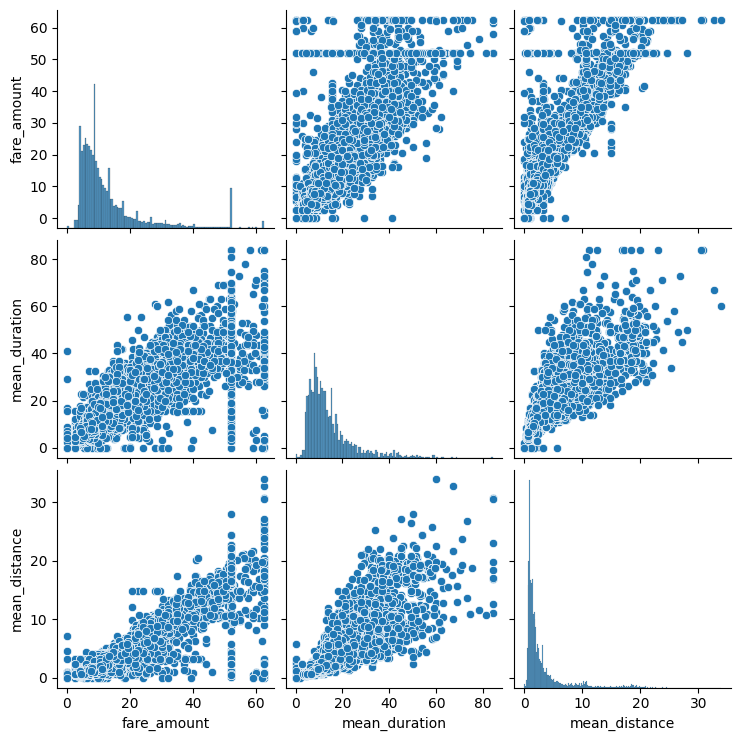

In [136]:
# Create a pairplot to visualize pairwise relationships between variables in the data
sns.pairplot(df0[['fare_amount', 'mean_duration', 'mean_distance']])

These variables all show linear correlation with each other. Investigate this further.

### Task 7. Identify correlations

Next, code a correlation matrix to help determine most correlated variables.

In [137]:
# Correlation matrix to help determine most correlated variables
df0.corr(numeric_only=True)['fare_amount'].sort_values(ascending=False)


fare_amount        1.000000
mean_distance      0.910187
mean_duration      0.860126
passenger_count    0.014942
VendorID           0.001045
rush_hour         -0.033589
Name: fare_amount, dtype: float64

Visualize a correlation heatmap of the data.

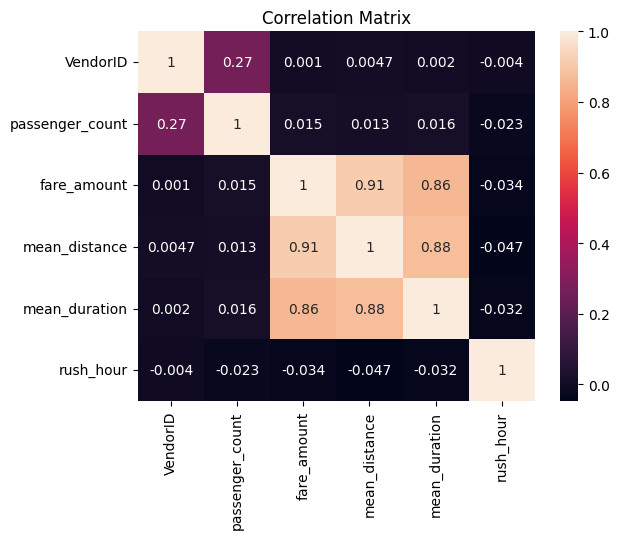

In [139]:
# Create correlation heatmap
corr_matrix = df0.corr(numeric_only=True)
sns.heatmap(corr_matrix, annot=True)
plt.title('Correlation Matrix')
plt.show()


**Question:** Which variable(s) are correlated with the target variable of `fare_amount`? 

trip_distance and mean_distance are most correlated with fare_amount

Try modeling with both variables even though they are correlated.

## PACE: **Construct**

After analysis and deriving variables with close relationships, it is time to begin constructing the model. Consider the questions in your PACE Strategy Document to reflect on the Construct stage.


### Task 8a. Split data into outcome variable and features

Set your X and y variables. X represents the features and y represents the outcome (target) variable.

In [159]:
# Remove the target column from the features
X = df0.copy().drop('fare_amount', axis=1)

# Set y variable
y = df0[['fare_amount']]

# Display first few rows
X.head()


,VendorID,passenger_count,mean_distance,mean_duration,day,month,rush_hour
0,2,6,3.52,23.00,Saturday,March,0
1,1,1,3.11,24.44,Tuesday,April,0
2,1,1,0.88,7.26,Friday,December,1
3,2,1,3.70,30.00,Sunday,May,0
4,2,1,4.44,15.00,Saturday,April,0


### Task 8b. Pre-process data


Dummy encode categorical variables

In [ ]:
# Convert VendorID to string
X['VendorID'] = X['VendorID'].astype(str)

# Get dummies
vendor_dummies = pd.get_dummies(X['VendorID'], drop_first=True, prefix='VendorID', dtype=int)
X = pd.concat([X.drop('VendorID', axis=1), vendor_dummies], axis=1)


       VendorID_2
0               1
1               0
2               0
3               1
4               1
...           ...
22694           1
22695           1
22696           1
22697           1
22698           0

[22699 rows x 1 columns]


In [161]:
# apply map for day and month
day_dict = {"Sunday":1, "Monday":2, "Tuesday": 3, "Wednesday": 4, "Thursday": 5, "Friday": 6, "Saturday": 7}
X['day'] = X['day'].map(day_dict)
month_dict = {"January":1, "February": 2, "March":3, "April":4, "May":5, "June":6, "July":7, "August":8,
             "September":9, "October":10, "November":11, "December":12}
X['month'] = X['month'].map(month_dict)

In [162]:
X.head()

,passenger_count,mean_distance,mean_duration,day,month,rush_hour,VendorID_2
0,6,3.52,23.00,7,3,0,1
1,1,3.11,24.44,3,4,0,0
2,1,0.88,7.26,6,12,1,0
3,1,3.70,30.00,1,5,0,1
4,1,4.44,15.00,7,4,0,1


### Split data into training and test sets

Create training and testing sets. The test set should contain 20% of the total samples. Set `random_state=0`.

In [163]:
# Create training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.80, test_size=0.20, random_state=0)


### Standardize the data

Use `StandardScaler()`, `fit()`, and `transform()` to standardize the `X_train` variables. Assign the results to a variable called `X_train_scaled`.

In [164]:
# Standardize the X variables
from sklearn.preprocessing import StandardScaler

continuous_features = ['mean_distance', 'mean_duration']
scaler = StandardScaler()

# scale continuous features
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train[continuous_features]),
                              columns=continuous_features,
                              index=X_train[continuous_features].index)

# merge scaled features with encoded categorical variables
X_train_scaled = pd.concat([X_train.drop(continuous_features, axis=1), X_train_scaled], axis=1)


In [165]:
X_train_scaled.head()

,passenger_count,day,month,rush_hour,VendorID_2,mean_distance,mean_duration
252,1,1,4,0,1,0.869490,0.156989
16220,1,2,4,1,1,-0.599144,-0.704638
9795,2,1,5,0,0,-0.478856,-0.588363
1972,1,2,1,1,0,-0.562778,-0.770229
21092,1,2,6,1,0,-0.562778,-0.814950


### Fit the model

Instantiate your model and fit it to the training data.

In [166]:
# Fit your model to the training data
from sklearn.linear_model import LinearRegression

model = LinearRegression().fit(X_train_scaled, y_train)


### Task 8c. Evaluate model

### Train data

Evaluate your model performance by calculating the residual sum of squares and the explained variance score (R^2). Calculate the Mean Absolute Error, Mean Squared Error, and the Root Mean Squared Error.

In [167]:
# Evaluate the model performance on the training data
y_pred = model.predict(X_train_scaled)
residuals = y_train - y_pred
rss = np.sum(residuals**2)
rss


c:\Users\Cameron\AppData\Local\Programs\Python\Python313\Lib\site-packages\numpy\_core\fromnumeric.py:84: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


fare_amount    324397.938667
dtype: float64

In [168]:
from sklearn.metrics import mean_absolute_error as mae, mean_squared_error as mse, r2_score

metrics = ['MAE', 'MSE', 'RMSE', 'R2']
scores = [mae(y_train, y_pred), mse(y_train, y_pred), np.sqrt(mse(y_train, y_pred)), r2_score(y_train, y_pred)]
for i in range(len(metrics)):
    print(f"{metrics[i]} Score: {scores[i]:.2f}")
    

MAE Score: 2.18
MSE Score: 17.86
RMSE Score: 4.23
R2 Score: 0.84


### Test data

Calculate the same metrics on the test data. Remember to scale the `X_test` data using the scaler that was fit to the training data. Do not refit the scaler to the testing data, just transform it. Call the results `X_test_scaled`.

In [169]:
# Scale the X_test data
# scale continuous features
X_test_scaled = pd.DataFrame(scaler.transform(X_test[continuous_features]),
                              columns=continuous_features,
                              index=X_test[continuous_features].index)

# merge scaled features with encoded categorical variables
X_test_scaled = pd.concat([X_test.drop(continuous_features, axis=1), X_test_scaled], axis=1)

In [170]:
# Evaluate the model performance on the testing data
y_pred = model.predict(X_test_scaled)
metrics = ['MAE', 'MSE', 'RMSE', 'R2']
scores = [mae(y_test, y_pred), mse(y_test, y_pred), np.sqrt(mse(y_test, y_pred)), r2_score(y_test, y_pred)]
for i in range(len(metrics)):
    print(f"{metrics[i]} Score: {scores[i]:.2f}")


MAE Score: 2.13
MSE Score: 14.31
RMSE Score: 3.78
R2 Score: 0.87


## PACE: **Execute**

Consider the questions in your PACE Strategy Document to reflect on the Execute stage.

### Task 9a. Results

Use the code cell below to get `actual`,`predicted`, and `residual` for the testing set, and store them as columns in a `results` dataframe.

In [171]:
# Create a `results` dataframe
y_pred = pd.DataFrame(y_pred,
                     columns=['predicted'],
                     index=y_test.index)
results = pd.concat([y_test, y_pred], axis=1)
results = results.rename({0:'fare_amount_predicted'}, axis=1)
results['residuals'] = results['fare_amount']-results['predicted']
results


,fare_amount,predicted,residuals
5818,14.0,12.336218,1.663782
18134,28.0,16.469226,11.530774
4655,5.5,6.799626,-1.299626
7378,15.5,16.105005,-0.605005
13914,9.5,10.536179,-1.036179
...,...,...,...
11108,21.5,20.752772,0.747228
7840,5.5,5.787842,-0.287842
8,9.0,7.311676,1.688324
16996,7.0,6.679096,0.320904


### Task 9b. Visualize model results

Create a scatterplot to visualize `actual` vs. `predicted`.

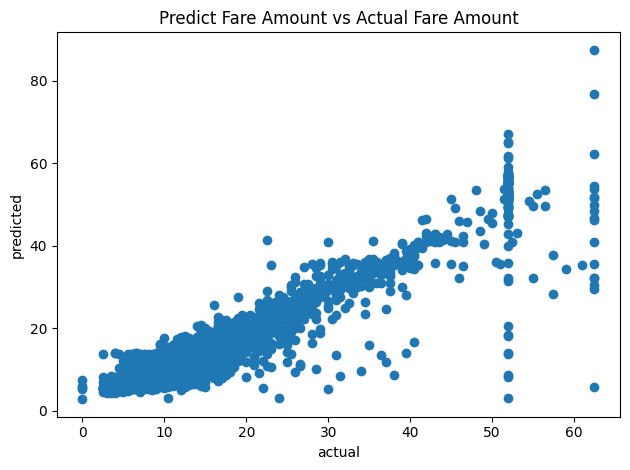

In [172]:
# Create a scatterplot to visualize `predicted` over `actual`
plt.scatter(x='fare_amount', y='predicted',data=results)
plt.xlabel('actual')
plt.ylabel('predicted')
plt.title('Predict Fare Amount vs Actual Fare Amount')
plt.tight_layout()
plt.show()

Visualize the distribution of the `residuals` using a histogram.

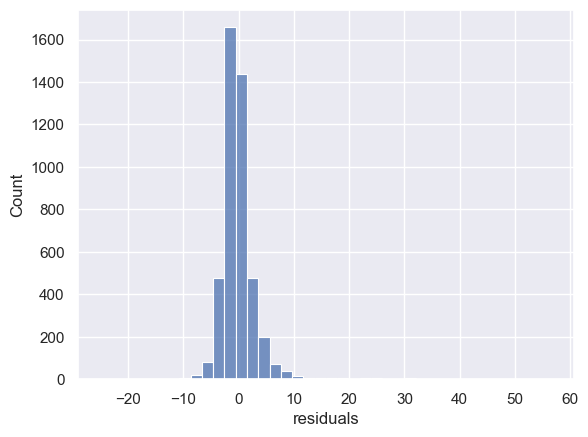

In [178]:
# Visualize the distribution of the `residuals`
sns.set_theme()
sns.histplot(results['residuals'], bins=40);


In [174]:
# Calculate residual mean
results['residuals'].mean()


np.float64(-0.017262568327723167)

Create a scatterplot of `residuals` over `predicted`.

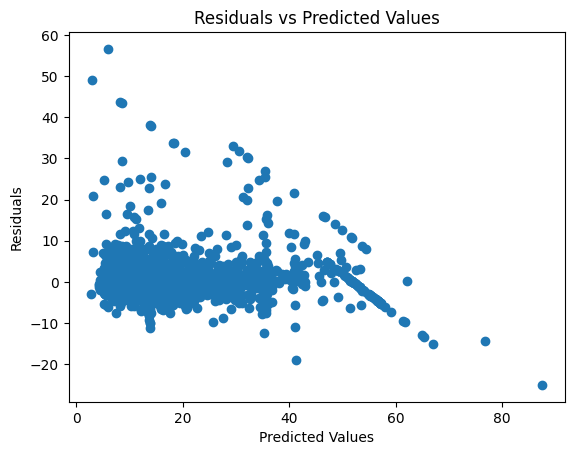

In [175]:
# Create a scatterplot of `residuals` over `predicted`
plt.scatter(y='residuals', x='predicted', data=results)
plt.ylabel('Residuals')
plt.xlabel('Predicted Values')
plt.title('Residuals vs Predicted Values')
plt.show()

### Task 9c. Coefficients

Use the `coef_` attribute to get the model's coefficients. The coefficients are output in the order of the features that were used to train the model. Which feature had the greatest effect on trip fare?

Mean distance has the largest effect on trip fare.

In [176]:
# Output the model's coefficients
coef_dict = dict(zip(list(X_test_scaled.columns), model.coef_.flatten()))
coef_dict 

{'passenger_count': np.float64(0.02263893503600569),
 'day': np.float64(0.059005792793462075),
 'month': np.float64(0.01653766479758627),
 'rush_hour': np.float64(0.11293898129617631),
 'VendorID_2': np.float64(-0.10856445946315993),
 'mean_distance': np.float64(7.114146367434715),
 'mean_duration': np.float64(2.8328059180869)}

What do these coefficients mean? How should they be interpreted?

These coefficients explain the step increase or decrease in fare amount in relation to the predictor variable.

### Task 9d. Conclusion

1. What are the key takeaways from this notebook?



2. What results can be presented from this notebook?



1. Variables mean_distance and mean_duration play the greatest roles in predicting the fare amount. 
2. Taxi cab drivers should prioritize rides that are longer on average to maximize earnings. The model explains 87% of the test data target's variance. The mean absolute error shows a $2 difference between the predicted fare amount and the true fare amount.